In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset-ESGImpactAnalysis.csv to Dataset-ESGImpactAnalysis.csv


In [ ]:
ESGDataset = pd.read_csv("Dataset-ESGImpactAnalysis.csv")

In [ ]:
print(ESGDataset.info())
print(ESGDataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company_ID        100 non-null    object 
 1   ESG_Score         100 non-null    float64
 2   Financial_Return  100 non-null    float64
 3   Industry          100 non-null    object 
 4   Risk_Score        100 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.0+ KB
None
        ESG_Score  Financial_Return  Risk_Score
count  100.000000        100.000000  100.000000
mean     5.203900          0.052500    5.578300
std      2.771118          0.136214    2.529162
min      1.120000         -0.200000    1.060000
25%      2.617500         -0.070000    3.535000
50%      5.240000          0.050000    5.680000
75%      7.735000          0.172500    7.560000
max      9.910000          0.280000    9.980000


In [ ]:
AvgESGScore = ESGDataset['ESG_Score'].groupby(ESGDataset['Industry']).mean()
print('\n AverageESGScore\n',AvgESGScore)


 AverageESGScore
 Industry
Energy        6.231905
Healthcare    5.307273
Retail        4.602414
Tech          4.974643
Name: ESG_Score, dtype: float64


In [ ]:
AvgRiskScore = ESGDataset['Risk_Score'].groupby(ESGDataset['Industry']).mean()
print('\n AverageRiskScore\n',np.round(AvgRiskScore,2))


 AverageRiskScore
 Industry
Energy        5.59
Healthcare    6.08
Retail        4.89
Tech          5.89
Name: Risk_Score, dtype: float64


In [ ]:
from scipy.stats import pearsonr

In [ ]:
#Correlation using scipy (ESG Vs Risk)
correlation, Pvalue = pearsonr(ESGDataset['ESG_Score'], ESGDataset['Risk_Score'])
print(f"ESG Vs Risk Correlation: {correlation}")
print(f"Pvalue: {Pvalue}")

ESG Vs Risk Correlation: -0.012961172045673472
Pvalue: 0.898158832867535


In [ ]:
#Correlation using scipy (ESG Vs Financial Returns)
correlation, Pvalue = pearsonr(ESGDataset['ESG_Score'], ESGDataset['Financial_Return'])
print(f"ESG Vs Financial Return Correlation: {correlation}")
print(f"Pvalue: {Pvalue}")

ESG Vs Financial Return Correlation: 0.10165690322474491
Pvalue: 0.31422403006997796


In [ ]:
#Simple Linear Regression (Dependent Var(Y) : Risk Score , Independent Var(X) : ESG Score)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = ESGDataset[['ESG_Score']]
Y = ESGDataset['Risk_Score']
model = LinearRegression(fit_intercept=True).fit(X,Y)
r_sq = model.score(X, Y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}") #Coeff : b0
print(f"slope: {model.coef_}") #Coeff : b1
y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")

coefficient of determination: 0.00016799198079786581
intercept: 5.639859478451598
slope: [-0.01182949]
predicted response:
[5.60070387 5.54841753 5.62223354 5.59384277 5.55220296 5.58473406
 5.59029392 5.57101185 5.59549889 5.61679197 5.59798309 5.62637386
 5.52759763 5.59124028 5.53315749 5.56722642 5.62400796 5.62566409
 5.57515217 5.53919053 5.62377137 5.57124844 5.61655538 5.54616992
 5.61501755 5.53221113 5.59928433 5.62388967 5.55539693 5.56698983
 5.61951276 5.59549889 5.62424455 5.55587011 5.54818094 5.61501755
 5.62187865 5.55657988 5.55669817 5.60034898 5.54238449 5.58426088
 5.61371631 5.58236816 5.56131167 5.59242323 5.59100369 5.53268431
 5.62661045 5.53469532 5.57598024 5.53256601 5.53020011 5.54404062
 5.56308609 5.59727332 5.61702856 5.61241506 5.52949034 5.52511343
 5.57183992 5.56178485 5.54108324 5.56142997 5.52688786 5.60721009
 5.60011239 5.61832981 5.52262924 5.59810138 5.62258842 5.60200511
 5.56166656 5.56178485 5.54818094 5.58201328 5.6093394  5.58355111
 5.622

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:567: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:905: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


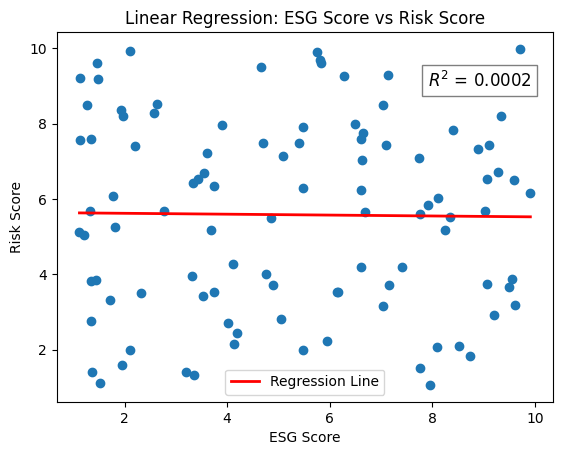

In [ ]:
plt.scatter(X, Y)
X_values = np.linspace(X.min(), X.max(), 100).reshape(-1,1)  # Generating values for smooth line
Y_pred = model.predict(X_values)  # Predicting ESG_Score
plt.plot(X_values, Y_pred, color='red', linewidth=2, label="Regression Line")
plt.text(X.max() - 2, Y.max() - 1, f"$R^2$ = {r_sq:.4f}", fontsize=12, color="black", bbox=dict(facecolor='white', alpha=0.5))
# Labels and Title
plt.xlabel("ESG Score")
plt.ylabel("Risk Score")
plt.title("Linear Regression: ESG Score vs Risk Score")
plt.legend()
plt.show()

In [ ]:
#Correlation between ESG, Risk and Financial Returns
correlation_matrix = ESGDataset[['ESG_Score', 'Financial_Return', 'Risk_Score']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                   ESG_Score  Financial_Return  Risk_Score
ESG_Score          1.000000          0.101657   -0.012961
Financial_Return   0.101657          1.000000    0.006296
Risk_Score        -0.012961          0.006296    1.000000


In [ ]:
import seaborn as sns

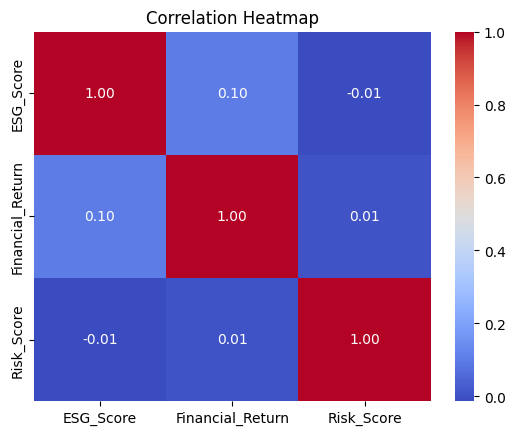

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

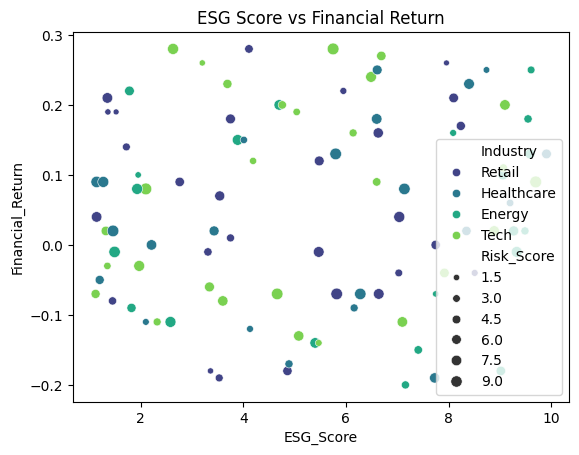

In [ ]:
sns.scatterplot(data=ESGDataset, x='ESG_Score', y='Financial_Return', hue='Industry', size='Risk_Score', palette='viridis')
plt.title("ESG Score vs Financial Return")
plt.show()

In [ ]:
positive_correlation = correlation_matrix.loc['ESG_Score', 'Financial_Return'] > 0
if positive_correlation:
    print("Higher ESG scores are associated with better financial returns.")
else:
    print("Higher ESG scores do not necessarily improve financial returns.")

Higher ESG scores are associated with better financial returns.
